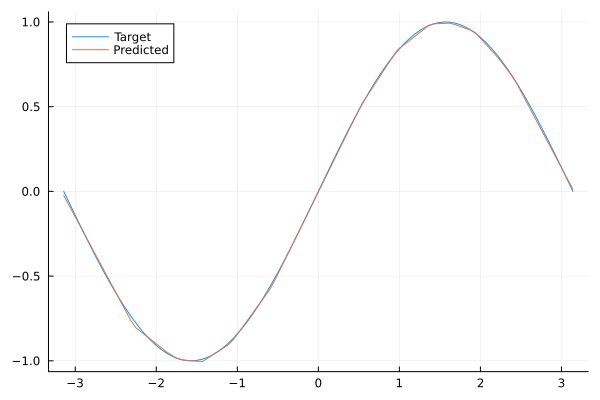

In [25]:
using Lux, Random, Optimization, OptimizationOptimisers,
      ComponentArrays, Zygote, Plots, LinearAlgebra
x = range(-pi, pi; length = 100)
y = sin.(x)
model = Chain(
    Dense(1 => 10, relu),
    Dense(10 => 10, relu),
    Dense(10 => 1)
)
function regression_loss(ps, (model, st, (x, y)))
    return norm(vec(model(x', ps, st)[1]) - y)
end
ps, st = Lux.setup(MersenneTwister(), model)
prob = OptimizationProblem(OptimizationFunction(regression_loss,
       Optimization.AutoZygote()), ComponentArray(ps), (model, st, (x, y)))
ret = solve(prob, Adam(0.03), maxiters = 250)
plot(x, y, label = "Target")
plot!(x, vec(model(x', ret.u, st)[1]), label = "Predicted")

In [1]:
using Flux, MLDatasets
x_train, y_train = MLDatasets.MNIST.traindata(Float32)
x_test, y_test = MLDatasets.MNIST.testdata(Float32)
x_train_flat = Flux.flatten(x_train)
x_test_flat = Flux.flatten(x_test)
dataset = [(x_train_flat, Flux.onehotbatch(y_train, 0:9))]
model = Chain(
    Dense(784, 196, relu),
    Dense(196, 49, relu),
    Dense(49, 10)
)
loss(x, y) = Flux.Losses.logitcrossentropy(model(x), y)
for epoch in 1:25
    Flux.train!(loss, Flux.params(model), dataset, Adam(0.003))
end
sum(Flux.onecold(model(x_test_flat)) .== (y_test .+ 1)) / length(y_test)

0.7979